In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train_comments.csv")

In [3]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
df.id.nunique()

159571

In [6]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:


col_list=["malignant","highly_malignant","rude","threat","abuse","loathe"]
df_raw=df[col_list]
categories = list(df_raw.columns.values)

In [8]:
df_raw

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


# eda

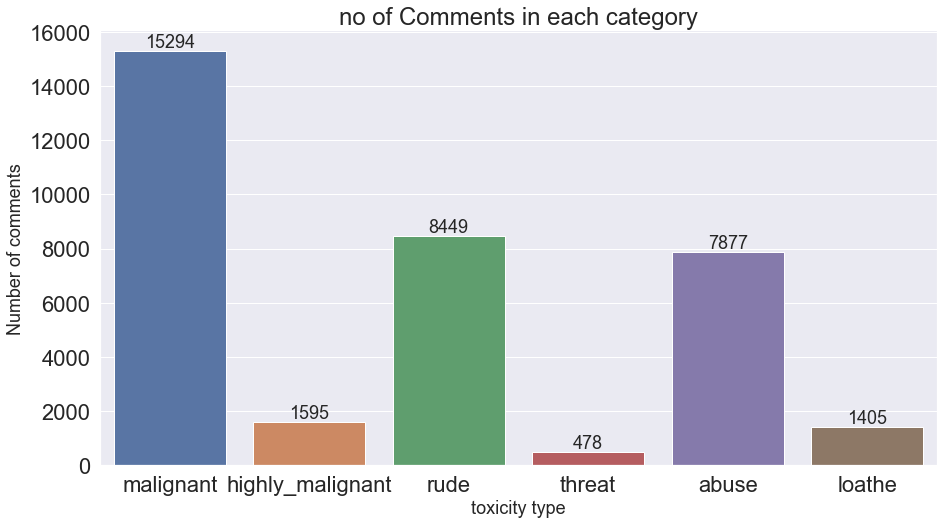

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df_raw.iloc[0:].sum().values)

plt.title("no of Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('toxicity type', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df_raw.iloc[0:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [10]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

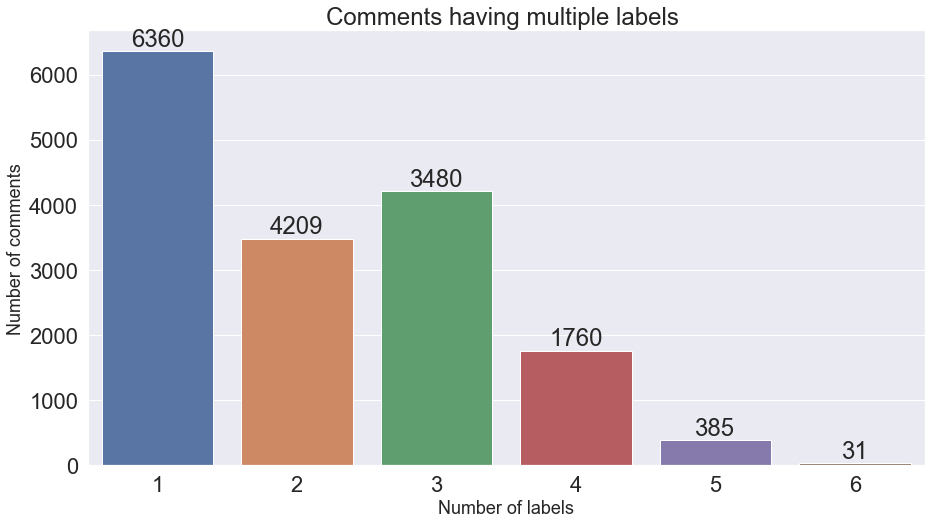

In [11]:
rowSums = df_raw.iloc[0:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
df['length']=df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


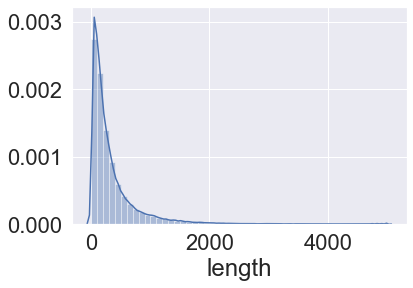

In [13]:
sns.distplot(df['length'])

In [14]:
import numpy as np
bin_values = np.arange(start=200, stop=1600, step=100)
print(bin_values)

[ 200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400 1500]


In [ ]:
#average length of comment is 300-400 approx

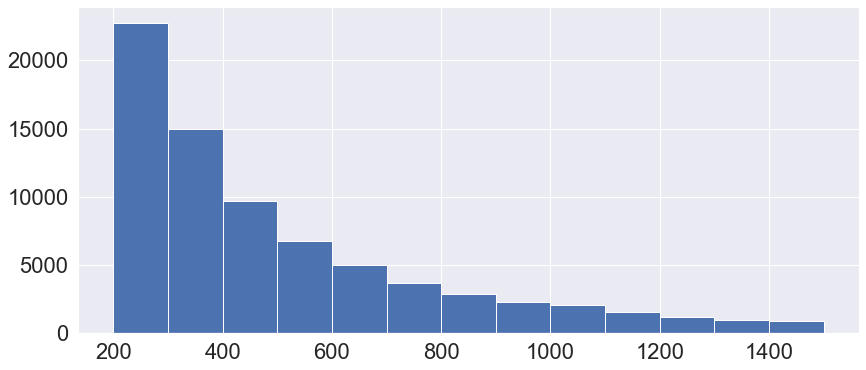

In [15]:
df['length'].hist(bins=bin_values, figsize=[14,6])

In [16]:
#maximum length
df['length'].max()

5000

In [17]:
df_8=df.nsmallest(100, ['length']) 
df_8

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
3638,09bba7e99ca9111e,39692,0,0,0,0,0,0,5
20594,365ed6e3fc2a02c0,42248,0,0,0,0,0,0,5
61465,a482fbaec19fc2e2,39113,0,0,0,0,0,0,5
65542,af51cba0bfb6ab60,40593,0,0,0,0,0,0,5
52442,8c4c53001134f290,"14:53,",0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...
124823,9bbdc58507a2ddf4,Test ping \n\nTest.,0,0,0,0,0,0,17
126642,a556ea4c35ee9e71,"I will help, too.",0,0,0,0,0,0,17
131746,c0f67acd6884f96d,India quick links,0,0,0,0,0,0,17
134289,ce1913b45a5bc115,YOU\n\n CUNT,1,0,1,0,1,0,17


In [18]:
counts = []
for category in categories:
    counts.append((category, df_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405


In [19]:
df_stats['total_no_of_toxic_comments']=df_stats["number of comments"].sum()
df_stats
#we can observe that if we sum the comments under each category they are just 35908 that means our dataset has a large amount of clean text

,category,number of comments,total_no_of_toxic_comments
0,malignant,15294,35098
1,highly_malignant,1595,35098
2,rude,8449,35098
3,threat,478,35098
4,abuse,7877,35098
5,loathe,1405,35098


In [20]:
df.malignant.value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [21]:
df.abuse.value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

# word cloud for each comment(toxic) type

In [22]:
from wordcloud import WordCloud


malignant = df[df.malignant==1]

malignant_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(malignant.comment_text.values))
highly_malignant = df[df.highly_malignant==1]

highly_malignant_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(highly_malignant.comment_text.values))
rude= df[df.rude==1]

rude_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(rude.comment_text.values))
threat= df[df.threat==1]

threat_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(threat.comment_text.values))
abuse= df[df.abuse==1]

abuse_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(abuse.comment_text.values))
loathe= df[df.loathe==1]

loathe_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(loathe.comment_text.values))

                 




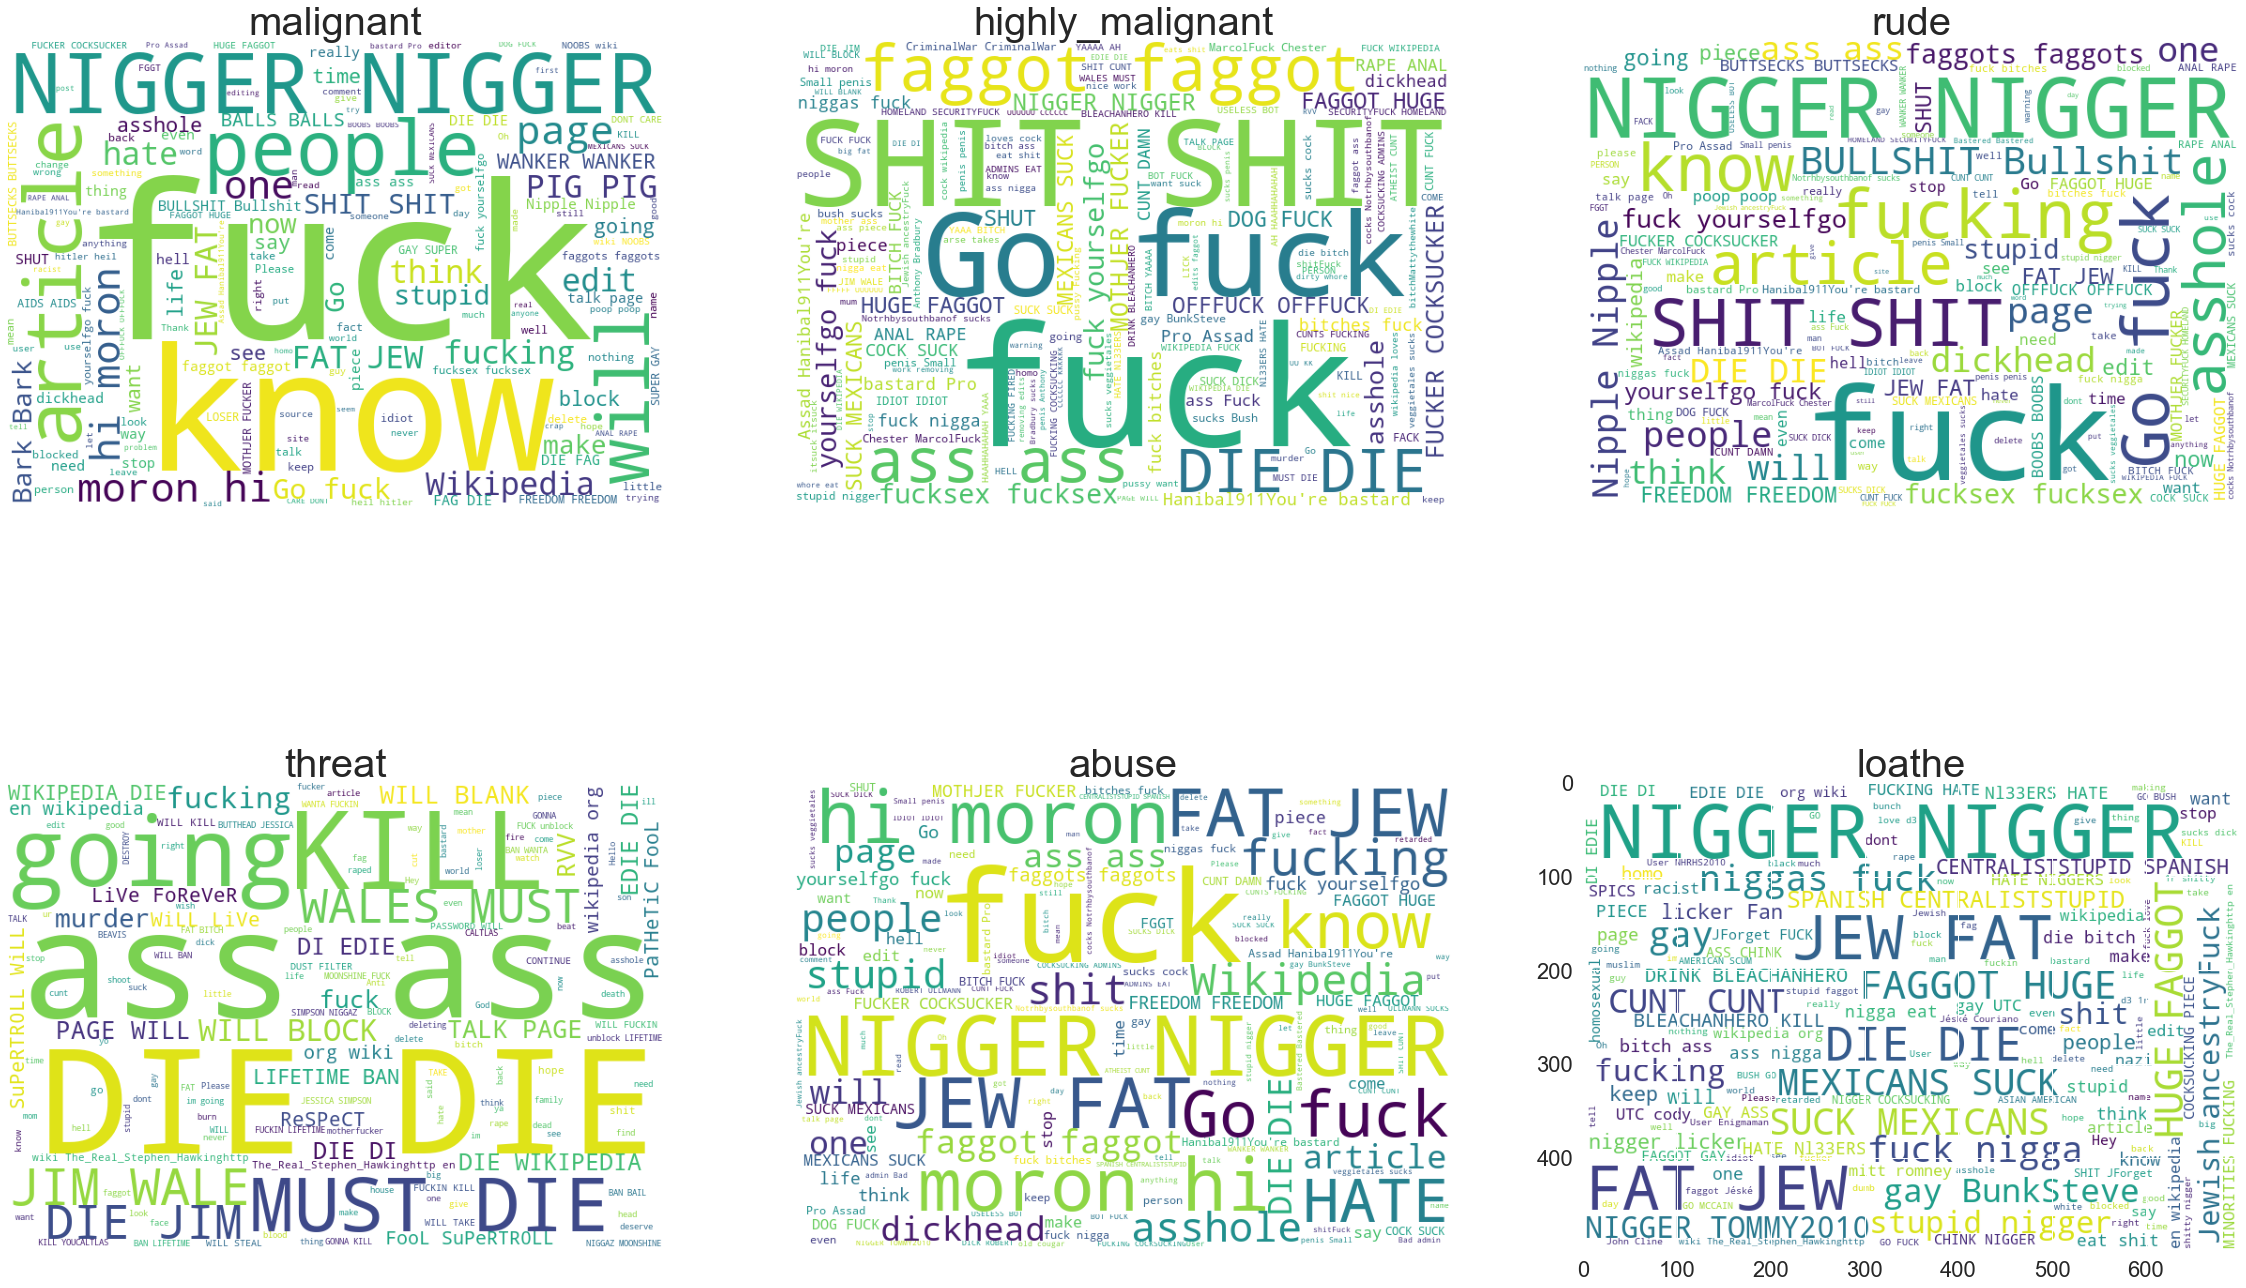

In [23]:
plt.figure(figsize=(40,25))
plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("malignant",fontsize=40)
plt.imshow(malignant_cloud)
plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("highly_malignant",fontsize=40)
plt.imshow(highly_malignant_cloud)
plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("rude",fontsize=40)
plt.imshow(rude_cloud)
plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("threat",fontsize=40)
plt.imshow(threat_cloud)
plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("abuse",fontsize=40)
plt.imshow(abuse_cloud)
plt.axis('off')
plt.subplot(2, 3, 6)
plt.title("loathe",fontsize=40)
plt.imshow(loathe_cloud)
plt.show()



In [24]:
df2=pd.read_csv("test_comments.csv",encoding = 'latin1')
df2.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [25]:
from nltk.tokenize import word_tokenize
import string

import nltk.corpus
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [26]:
nltk.download('punkt')
punct=string.punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
df['comment_text'].isnull().sum()

0

# data cleaning

In [34]:
df['comment_text'] = df['comment_text'].str.lower()




df['comment_text']=df['comment_text'].str.replace(r'<.*?>',"")
df['comment_text']=df['comment_text'].str.replace(r'[?|!|\'|"|#]', "")
df['comment_text']=df['comment_text'].str.replace(r'[.|,|)|(|\|/]', "")





from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df['comment_text'] = df['comment_text'].apply(lambda x: convert(x)) 


 




In [40]:
df['comment_text']=df['comment_text'].str.replace(':',' ')
df['comment_text']=df['comment_text'].str.replace('-',' ')
df['comment_text']=df['comment_text'].str.replace('*',' ')
df['comment_text']=df['comment_text'].str.replace('=',' ')
df['comment_text']=df['comment_text'].str.replace(']',' ')


df['comment_text']=df['comment_text'].str.replace('\s+',' ')


In [44]:
df['comment_text'][800]

'what the fuck you doing arsehole dickhead cockface'

In [45]:
df['clean_length'] = df.comment_text.str.len()

df.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,yo bitch ja rule is more succesful then youll ...,0,0,0,0,0,0,264,355.0
1,000103f0d9cfb60f,from rfc the title is fine as it is imo,0,0,0,0,0,0,112,40.0
2,000113f07ec002fd,sources zawe ashton on lapland â,0,0,0,0,0,0,233,36.0
3,0001b41b1c6bb37e,if you have a look back at the source the inf...,0,0,0,0,0,0,622,200.0
4,0001d958c54c6e35,i dont anonymously edit articles at all,0,0,0,0,0,0,67,39.0


In [46]:
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())
#we cann see a significant change in length

Origian Length 62797479
Clean Length 49091409.0


In [ ]:
#cleaning test dataframe

In [47]:
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','im','dont','doin','ure','i','and','on','us','would','apple-iss','one','also','c','e'])
 
df2['comment_text'] = df2['comment_text'].str.lower()

df2['comment_text'] =df2['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


df2['comment_text']=df2['comment_text'].str.replace(r'<.*?>',"")
df2['comment_text']=df2['comment_text'].str.replace(r'[?|!|\'|"|#]', "")
df2['comment_text']=df2['comment_text'].str.replace(r'[.|,|)|(|\|/|-|~|*]', "")
df2['comment_text']=df2['comment_text'].str.replace(':',' ')
df2['comment_text']=df2['comment_text'].str.replace('-',' ')
df2['comment_text']=df2['comment_text'].str.replace('*',' ')
df2['comment_text']=df2['comment_text'].str.replace('=',' ')
df2['comment_text']=df2['comment_text'].str.replace(']',' ')


df2['comment_text']=df2['comment_text'].str.replace('\s+',' ')

















from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df2['comment_text'] = df2['comment_text'].apply(lambda x: convert(x)) 




In [53]:
df2["comment_text"][20]

'indefinitely blocked indefinitely blocked account'

In [52]:
df2.tail()

,id,comment_text
153159,fffcd0960ee309b5,totally agree stuff nothing long crap
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...
153161,fffda9e8d6fafa9e,okinotorishima categories see changes agree m...
153162,fffe8f1340a79fc2,one founding nations eu germany law return qu...
153163,ffffce3fb183ee80,stop already bullshit welcome here im fool th...


In [ ]:
punct

In [ ]:
#df clean lenght
#df clean lenght histplot
#df length min max

In [54]:
df_final=df.append(df2)


In [55]:
df_final.isnull().sum()

id                       0
comment_text          6407
malignant           153164
highly_malignant    153164
rude                153164
threat              153164
abuse               153164
loathe              153164
length              153164
clean_length        159571
dtype: int64

In [56]:
df_final.shape

(312735, 10)

In [57]:
label = df[["malignant","highly_malignant","rude","threat","abuse","loathe"]]
print(label.head())


   malignant  highly_malignant  rude  threat  abuse  loathe
0          0                 0     0       0      0       0
1          0                 0     0       0      0       0
2          0                 0     0       0      0       0
3          0                 0     0       0      0       0
4          0                 0     0       0      0       0


In [58]:
import re

import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("â",'',sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df2.comment_text.values.tolist()
data_words = list(sent_to_words(data))
print(data[:1])

['yo bitch ja rule succesful ever whats hating sad mofuckasi bitch slap pethedic white faces get kiss ass guys sicken me ja rule pride da music man diss shit him nothin wrong bein like tupac brother toofuckin white boys get things right next time']


In [59]:
import gensim
dictionary = gensim.corpora.Dictionary(data_words)
print(dictionary)

Dictionary(202884 unique tokens: ['ass', 'bein', 'bitch', 'boys', 'brother']...)


In [66]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(data)) 
texts=listToString(data)
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(texts)
from nltk.probability import FreqDist
stoplist=[';','im','it']
filtered_tokenized_text = [word for word in tokenized_word if word not in stoplist]

fdist = FreqDist(filtered_tokenized_text)







# fdist

In [67]:
fdist.most_common(30)

[('article', 43667),
 ('page', 30092),
 ('wikipedia', 29556),
 ('fuck', 24209),
 ('like', 23177),
 ('please', 20039),
 ('think', 17411),
 ('see', 16845),
 ('talk', 15504),
 ('people', 14731),
 ('know', 14131),
 ('you', 12599),
 ('articles', 12567),
 ('edit', 12509),
 ('use', 12331),
 ('time', 11635),
 ('may', 11465),
 ('get', 10815),
 ('even', 10082),
 ('good', 9995),
 ('make', 9959),
 ('well', 9812),
 ('thanks', 9662),
 ('sources', 9234),
 ('name', 9171),
 ('could', 9066),
 ('say', 8981),
 ('wp', 8897),
 ('section', 8837),
 ('way', 8784)]

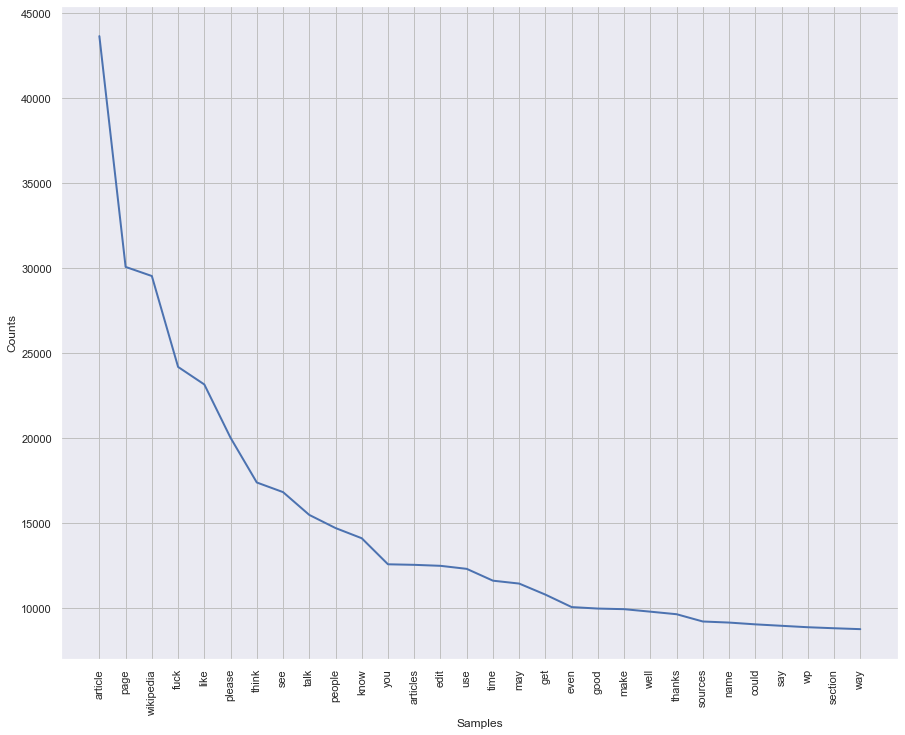

In [68]:
sns.set(font_scale = 1)
plt.figure(figsize=(15,12))

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [71]:
df_final.dropna(inplace=True)

In [ ]:
#splitting into train and test training samples 1 lakh testing samples 20,000

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()
classes = ["malignant","highly_malignant","rude","threat","abuse","loathe"]

X_train= tf_vec.fit_transform(df_final['comment_text'])[0:50000]
X_test=tf_vec.transform(df_final['comment_text'])[:10000]
Y_train=df_final[classes].values[0:50000]
Y_test = df_final[classes].values[0:10000]

In [73]:
Y_train.shape

(50000, 6)

In [74]:
X_train.shape



(50000, 235478)

In [75]:
!pip install scikit-multilearn

# binary relevance

In [76]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=SVC(), require_dense=[False, True])

In [77]:
predictions_BR = classifier.predict(X_test)

In [78]:
print ('Final score = > ', accuracy_score(Y_test,predictions_BR))

Final score = >  0.8973


In [79]:
print(classification_report(Y_test,predictions_BR))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       971
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00       527
           3       0.00      0.00      0.00        33
           4       1.00      0.00      0.00       494
           5       0.00      0.00      0.00        84

   micro avg       1.00      0.00      0.01      2210
   macro avg       0.33      0.00      0.00      2210
weighted avg       0.66      0.00      0.01      2210
 samples avg       0.00      0.00      0.00      2210



C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# roc-auc score for binary relevance

In [80]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average) 

In [81]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve,roc_auc_score
multiclass_roc_auc_score(Y_test,predictions_BR)

0.5005978018404166

In [82]:
col_list=["malignant","highly_malignant","rude","threat","abuse","loathe"]
df_raw=df[col_list]

In [83]:
categories = list(df_raw.columns.values)

In [84]:
df.shape

(159571, 10)

In [85]:
df_train = df.iloc[70000:]
df_train.shape

(89571, 10)

In [86]:
df_test=df2.iloc[60000:]
df_test.shape

(93164, 2)

In [ ]:
#now i'll be renaming my text column of test datframe so that i can merge them and use it in testing  and will be used 5000 samples only in order to avoid memory issues

In [87]:
df2.rename(columns={'comment_text':'comment_text_test'},inplace=True)
df2.head()

,id,comment_text_test
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,rfc title fine is imo
2,00013b17ad220c46,sources zawe ashton lapland â
3,00017563c3f7919a,look back source information updated correct f...
4,00017695ad8997eb,anonymously edit articles all


In [88]:
df_finall=pd.concat([df, df2], axis=1)

In [90]:
df_finall.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,id,comment_text_test
0,0000997932d777bf,yo bitch ja rule is more succesful then youll ...,0,0,0,0,0,0,264,355.0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...
1,000103f0d9cfb60f,from rfc the title is fine as it is imo,0,0,0,0,0,0,112,40.0,0000247867823ef7,rfc title fine is imo
2,000113f07ec002fd,sources zawe ashton on lapland â,0,0,0,0,0,0,233,36.0,00013b17ad220c46,sources zawe ashton lapland â
3,0001b41b1c6bb37e,if you have a look back at the source the inf...,0,0,0,0,0,0,622,200.0,00017563c3f7919a,look back source information updated correct f...
4,0001d958c54c6e35,i dont anonymously edit articles at all,0,0,0,0,0,0,67,39.0,00017695ad8997eb,anonymously edit articles all


In [ ]:
df_finall.isnull().sum()


In [ ]:

df_finall.head()

In [91]:
df_finall.drop(['id','length','clean_length'],axis=1,inplace=True)
df_finall.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text_test
0,yo bitch ja rule is more succesful then youll ...,0,0,0,0,0,0,yo bitch ja rule succesful ever whats hating s...
1,from rfc the title is fine as it is imo,0,0,0,0,0,0,rfc title fine is imo
2,sources zawe ashton on lapland â,0,0,0,0,0,0,sources zawe ashton lapland â
3,if you have a look back at the source the inf...,0,0,0,0,0,0,look back source information updated correct f...
4,i dont anonymously edit articles at all,0,0,0,0,0,0,anonymously edit articles all


In [92]:
df_finall.dropna(inplace=True)

In [93]:
import numpy as np
data_final=df_finall
data_final = df_finall.loc[np.random.choice(df_finall.index, size=5000)]
data_final.shape

(5000, 8)

In [94]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_final, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(3500, 8)
(1500, 8)


In [95]:
train_text = train['comment_text']
test_text = test['comment_text_test']


In [96]:
tf_vec.fit(train_text)
tf_vec.fit(test_text)

TfidfVectorizer()

In [97]:
train_text.shape

(3500,)

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [99]:
col_list=["malignant","highly_malignant","rude","threat","abuse","loathe"]
df_raw=df[col_list]
categories = list(df_raw.columns.values)


In [100]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['comment_text','comment_text_test'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['comment_text','comment_text_test'], axis=1)

# OneVsRestClassifier

In [101]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in categories:
    print('**toxicity type- {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train,train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")


**toxicity type- malignant comments...**
Test accuracy is 0.9053333333333333


**toxicity type- highly_malignant comments...**
Test accuracy is 0.99


**toxicity type- rude comments...**
Test accuracy is 0.9513333333333334


**toxicity type- threat comments...**
Test accuracy is 0.9966666666666667


**toxicity type- abuse comments...**
Test accuracy is 0.9566666666666667


**toxicity type- loathe comments...**
Test accuracy is 0.9893333333333333




# ClassifierChain

In [102]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [103]:
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8993333333333333




# LabelPowerset

In [104]:
from skmultilearn.problem_transform import LabelPowerset

In [105]:

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions_labelpowerset = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_labelpowerset))
print("\n")

Accuracy =  0.8993333333333333




In [ ]:
#from sklearn.naive_bayes import GaussianNB
#classifier = LabelPowerset(GaussianNB())

# train
#classifier.fit(x_train, y_train)

# predict
#predictions_labelpowerset_2 = classifier.predict(x_test)

# accuracy
#print("Accuracy = ",accuracy_score(y_test,predictions_labelpowerset))
#print("results with naive bayes\n")
#same accuracy as lg with label powerset

In [114]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [115]:

classifier_new = MLkNN(k=10)

#  this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Accuracy =  0.8993333333333333




In [107]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


In [108]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average) 

In [ ]:
#roc auc for label powerset

In [106]:

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve,roc_auc_score

multiclass_roc_auc_score(y_test,predictions_labelpowerset)

0.5

In [ ]:
#roc_auc for chain classifier

In [109]:
multiclass_roc_auc_score(y_test,prediction)

0.5

In [ ]:
#roc_auc for binary relevance

In [110]:
multiclass_roc_auc_score(Y_test,predictions_BR)

0.5005978018404166